In [1]:
import numpy as np
import pandas as pd
from os.path import join

# (1) below code removes extra commas in column K related to profession:
the output file will have the same name as the input, but including '_' at the beginning

In [2]:
# # for small files
# input_file_header = './../header.txt'
# input_folder = './../Data/Dataton_train/Splitted/'
# input_file_data_lista = [
#     'Dataton_train_1.csv', 'Dataton_train_2.csv', 'Dataton_train_3.csv',
#     'Dataton_train_4.csv', 'Dataton_train_5.csv', 'Dataton_train_6.csv', 'Dataton_train_7.csv',
#     'Dataton_train_8.csv', 'Dataton_train_9.csv', 'Dataton_train_10.csv', 'Dataton_train_11.csv'
#     ]
# output_folder = './../Data/Dataton_train/Splitted/'

# whole dataset
input_file_header = './header.txt'
input_folder = './../Data/Dataton_train/'
input_file_data_lista = ['Dataton_train.csv']
output_folder = './../Data/Dataton_train/'

for ix,input_file_data in enumerate(input_file_data_lista):
    output_file = "_"+input_file_data
        
    # create file
    text_file = open(output_folder + output_file, "w")
    n = text_file.write("")
    text_file.close()
    
    # open file to append string
    text_file = open(output_folder + output_file, "wt")
    
    outputString = ""
    with open(input_folder+input_file_data) as fp:
        line = fp.readline()
        cnt = 0
        while line:
            # correcting length of lines by extra commas
            stringLength = line.count(',')
            if stringLength > 64:
                nDiff = stringLength - 64
                lineL = list(line)
                count = 0
                for ix, val in enumerate(lineL):
                    if val == ',':
                        if count > 6 and count <= 6 + nDiff:
                            lineL[ix] = "-"
                        count += 1
                line = "".join(lineL)
            # append to output
            outputString = outputString + line
            # read next line
            line = fp.readline()
            cnt += 1
            # write into file every 10.000 lines
            if (cnt > 10000):
                n = text_file.write(outputString)
                outputString = ""

    # close file at the end
    text_file.close()
    print('ready: {}'.format(output_file))

ready: _Dataton_train.csv


# (2 - one step) Reformating data in one step (to understand step by step go to next section)
### output files will add have same name as input file but adding '_' at the beginning
It reads dataset file, processes it and saves it using the expected format variables. 

In [1]:
import numpy as np
import pandas as pd

# # for small files
# input_file_header = './../header.txt'
# input_folder = './../Data/Dataton_train/Splitted/'
# input_file_data_lista = [
#     '_Dataton_train_1.csv', '_Dataton_train_2.csv', '_Dataton_train_3.csv',
#     '_Dataton_train_4.csv', '_Dataton_train_5.csv', '_Dataton_train_6.csv', '_Dataton_train_7.csv',
#     '_Dataton_train_8.csv', '_Dataton_train_9.csv', '_Dataton_train_10.csv', '_Dataton_train_11.csv'
#     ]
# output_folder = input_folder

# whole dataset
input_file_header = './header.txt'
input_folder = './../Data/Dataton_train/'
input_file_data_lista = ['_Dataton_train.csv']
output_folder = input_folder

# variables to check
cols_to_check = [
    'edad',
     'categoria',
     'mora_max',
     'cant_moras_30_ult_12_meses',
     'cant_moras_60_ult_12_meses',
     'cant_moras_90_ult_12_meses',
     'nro_tot_cuentas',
     'ctas_activas',
     'ctas_embargadas',
     'cuota_cred_hipot',
     'ingreso_final',
     'cant_mora_30_tdc_ult_3m_sf',
     'cant_mora_30_consum_ult_3m_sf',
     'cant_oblig_tot_sf',
     'cant_cast_ult_12m_sr',
     'ind',
     'pol_centr_ext',
     'ingreso_nomina',
     'ingreso_segurida_social'
]

listVarIntegers = [
     'categoria',
     'mora_max',
     'cant_moras_30_ult_12_meses',
     'cant_moras_60_ult_12_meses',
     'cant_moras_90_ult_12_meses',
     'nro_tot_cuentas',
     'ctas_activas',
     'ctas_embargadas',
     'ingreso_segurida_social',

]

for ix,input_file_data in enumerate(input_file_data_lista):
    
    output_file = "_"+input_file_data

    # reading headers
    header_cols = np.array( pd.read_csv(input_folder + input_file_header, header = None) )[0]
    
    # reading whole data file 
    # df = pd.read_csv( input_folder + input_file_data, header = None, sep =",")
    
    # reading data
    firstTime = True
    for df in pd.read_csv(input_folder + input_file_data, header = None, iterator=True, chunksize=1000000):
            
        # adding header names to dataframe
        df.columns = ( header_cols )

        # try to convert data to numeric,
        # if it fails, then look for '\\N' to transform it into np.nan.
        # finally try again to convert data to numeric format.
        # it prints each category with the number of erroneous data
        for col in cols_to_check:
            try:
                if col in listVarIntegers:
                    # as integers
                    df[col] = pd.to_numeric( df[col] , downcast = 'integer' )
                else:
                    # as float
                    df[col] = pd.to_numeric( df[col] , downcast = 'float' )
            except:
                var = df[col].to_numpy() # var is pointing to dataframe df
                count = 0
                for ix, item in enumerate(var):
                    if not (isinstance(item, float)):
                        if (item == '\\N'):
                            var[ix] = np.nan
                            count += 1                      
                #print('{} : {}'.format( col, count) )
            if col in listVarIntegers:
                # as integers
                df[col] = pd.to_numeric( df[col] , downcast = 'integer' )
            else:
                # as float
                df[col] = pd.to_numeric( df[col] , downcast = 'float' )

        # formating float64 to 32 bits
        for k in range( len(df.columns) ):
            if str(df.iloc[:,k].dtypes) == 'float64':
                df.iloc[:,k] = pd.to_numeric( df.iloc[:,k] , downcast = 'float' )

        if (firstTime):
            # saving results
            df.to_csv(output_folder + output_file, sep = ',', index = False, header = False)
            firstTime = False
        else:
            df.to_csv(output_folder + output_file, sep = ',', index = False, header = False, mode='a')
            
print('ready: {}'.format(output_file) )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,11,29,30,32,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,29,30,32,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ready: __Dataton_train.csv


# (2- step by step). To run all in one cell for various files go to next section

In [48]:
input_file_data = '_Dataton_train_1.csv'
input_file_header = './../header.txt'
input_folder = './../Data/Dataton_train/Splitted/'

output_file = input_file_data
output_folder = input_folder

In [3]:
# reading data
df = pd.read_csv( input_folder + input_file_data, header = None, sep =",")
# reading headers
header_cols = np.array( pd.read_csv(input_folder + input_file_header, header = None) )[0]
# adding header names to dataframe
df.columns = ( header_cols )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,29,30,32,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


about above result: The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column. (https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options)

In [4]:
df

,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,ocupacion,tipo_vivienda,...,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201908,2089776,19840630,35.0582,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1,0,311715.5,C,0,\N,1255032,\N,232526.0
1,201909,2089776,19840630,35.1431,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1,0,311715.5,C,0,\N,1255032,\N,265900.0
2,201907,2089776,19840630,34.9624,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1,0,311306,C,0,\N,1255032,\N,243052.0
3,201903,2089776,19840630,34.6393,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,1,0,311306,C,0,\N,1172612,\N,276014.0
4,201911,2089776,19840630,35.3073,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,ALQUILADA,...,0.0,0,0,677516,C,0,\N,1255032,\N,418866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089651,202008,1823154,19830618,37.0951,M,SOLTERO,NO INFORMA,\N,Empleado,FAMILIAR,...,0.0,2,0,848790,G,4,\N,\N,\N,335692.0
2089652,202001,87167,19821202,37.0376,M,NO INFORMA,NO INFORMA,\N,Independiente,ALQUILADA,...,0.0,\N,\N,4.36016e+06,SIN INFO,\N,\N,\N,\N,112700.0
2089653,202008,87167,19821202,37.6372,M,NO INFORMA,NO INFORMA,\N,Independiente,ALQUILADA,...,0.0,\N,\N,6.30046e+06,SIN INFO,\N,\N,\N,\N,510292.0
2089654,201911,87167,19821202,36.8843,M,NO INFORMA,NO INFORMA,\N,Independiente,ALQUILADA,...,0.0,\N,\N,5.00514e+06,SIN INFO,\N,\N,\N,\N,61900.0


In [5]:
for k in range( len(df.columns) ):
    print( '{} \t:\t {}'.format( df.iloc[:,k].dtype , header_cols[k] ))

int64 	:	 periodo
int64 	:	 id_cli
int64 	:	 fecha_nacimiento
object 	:	 edad
object 	:	 genero
object 	:	 estado_civil
object 	:	 nivel_academico
object 	:	 profesion
object 	:	 ocupacion
object 	:	 tipo_vivienda
int64 	:	 ult_actual
object 	:	 categoria
int64 	:	 codigo_ciiu
object 	:	 ind_mora_vigente
object 	:	 cartera_castigada
object 	:	 ciudad_residencia
object 	:	 departamento_residencia
object 	:	 ciudad_laboral
object 	:	 departamento_laboral
object 	:	 rechazo_credito
object 	:	 mora_max
object 	:	 cant_moras_30_ult_12_meses
object 	:	 cant_moras_60_ult_12_meses
object 	:	 cant_moras_90_ult_12_meses
float64 	:	 cupo_total_tc
object 	:	 tenencia_tc
float64 	:	 cuota_tc_bancolombia
object 	:	 tiene_consumo
object 	:	 tiene_crediagil
object 	:	 nro_tot_cuentas
object 	:	 ctas_activas
object 	:	 tiene_ctas_activas
object 	:	 ctas_embargadas
object 	:	 tiene_ctas_embargadas
object 	:	 pension_fopep
object 	:	 cuota_cred_hipot
object 	:	 tiene_cred_hipo_1
object 	:	 tiene_cred_hip

In [6]:
cols_to_check = [
    'edad',
     'categoria',
     'mora_max',
     'cant_moras_30_ult_12_meses',
     'cant_moras_60_ult_12_meses',
     'cant_moras_90_ult_12_meses',
     'nro_tot_cuentas',
     'ctas_activas',
     'ctas_embargadas',
     'cuota_cred_hipot',
     'ingreso_final',
     'cant_mora_30_tdc_ult_3m_sf',
     'cant_mora_30_consum_ult_3m_sf',
     'cant_oblig_tot_sf',
     'cant_cast_ult_12m_sr',
     'ind',
     'pol_centr_ext',
     'ingreso_nomina',
     'ingreso_segurida_social'
]

listVarIntegers = [
     'categoria',
     'mora_max',
     'cant_moras_30_ult_12_meses',
     'cant_moras_60_ult_12_meses',
     'cant_moras_90_ult_12_meses',
     'nro_tot_cuentas',
     'ctas_activas',
     'ctas_embargadas',
     'ingreso_segurida_social',

]

* Changing \\n for nan values:

In [7]:
# try to convert data to numeric,
# if it fails, then look for '\\N' to transform it into np.nan.
# finally try again to convert data to numeric format.
# it prints each category with the number of erroneous data
for col in cols_to_check:
    try:
        if col in listVarIntegers:
            # as integers
            df[col] = pd.to_numeric( df[col] , downcast = 'integer' )
        else:
            # as float
            df[col] = pd.to_numeric( df[col] , downcast = 'float' )
    except:
        var = df[col].to_numpy() # var is pointing to dataframe df
        count = 0
        for ix, item in enumerate(var):
            if not (isinstance(item, float)):
                if (item == '\\N'):
                    var[ix] = np.nan
                    count += 1                      
        print('{} : {}'.format( col, count) )
    if col in listVarIntegers:
        # as integers
        df[col] = pd.to_numeric( df[col] , downcast = 'integer' )
    else:
        # as float
        df[col] = pd.to_numeric( df[col] , downcast = 'float' )

edad : 525
categoria : 22819
mora_max : 593247
cant_moras_30_ult_12_meses : 593247
cant_moras_60_ult_12_meses : 593247
cant_moras_90_ult_12_meses : 593247
nro_tot_cuentas : 10
ctas_activas : 10
ctas_embargadas : 10
cuota_cred_hipot : 1927888
ingreso_final : 15215
cant_mora_30_tdc_ult_3m_sf : 326473
cant_mora_30_consum_ult_3m_sf : 326473
cant_oblig_tot_sf : 338751
cant_cast_ult_12m_sr : 338751
ind : 696
pol_centr_ext : 306909
ingreso_nomina : 1540662
ingreso_segurida_social : 1508065


* print types again:

In [8]:
for k in range( len(df.columns) ):
    print( '{} \t:\t {}'.format( df.iloc[:,k].dtype , header_cols[k] ))

int64 	:	 periodo
int64 	:	 id_cli
int64 	:	 fecha_nacimiento
float32 	:	 edad
object 	:	 genero
object 	:	 estado_civil
object 	:	 nivel_academico
object 	:	 profesion
object 	:	 ocupacion
object 	:	 tipo_vivienda
int64 	:	 ult_actual
float64 	:	 categoria
int64 	:	 codigo_ciiu
object 	:	 ind_mora_vigente
object 	:	 cartera_castigada
object 	:	 ciudad_residencia
object 	:	 departamento_residencia
object 	:	 ciudad_laboral
object 	:	 departamento_laboral
object 	:	 rechazo_credito
float64 	:	 mora_max
float64 	:	 cant_moras_30_ult_12_meses
float64 	:	 cant_moras_60_ult_12_meses
float64 	:	 cant_moras_90_ult_12_meses
float64 	:	 cupo_total_tc
object 	:	 tenencia_tc
float64 	:	 cuota_tc_bancolombia
object 	:	 tiene_consumo
object 	:	 tiene_crediagil
float64 	:	 nro_tot_cuentas
float64 	:	 ctas_activas
object 	:	 tiene_ctas_activas
float64 	:	 ctas_embargadas
object 	:	 tiene_ctas_embargadas
object 	:	 pension_fopep
float32 	:	 cuota_cred_hipot
object 	:	 tiene_cred_hipo_1
object 	:	 tien

> integer variables were not returned as int because it contains nan values. 
Depending on the variable meaning, it could be possible to transform nan values into a numeric value 
by using :
<br>
_dataframe.fillna(newValue)_

* in order to make an efficient memory usage, every float64 data will be transformed into float32:

In [43]:
for k in range( len(df.columns) ):
    if str(df.iloc[:,k].dtypes) == 'float64':
        df.iloc[:,k] = pd.to_numeric( df.iloc[:,k] , downcast = 'float' )

* print types again:

In [45]:
for k in range( len(df.columns) ):
    print( '{} \t:\t {}'.format( df.iloc[:,k].dtype , header_cols[k] ))

int64 	:	 periodo
int64 	:	 id_cli
int64 	:	 fecha_nacimiento
float32 	:	 edad
object 	:	 genero
object 	:	 estado_civil
object 	:	 nivel_academico
object 	:	 profesion
object 	:	 ocupacion
object 	:	 tipo_vivienda
int64 	:	 ult_actual
float32 	:	 categoria
int64 	:	 codigo_ciiu
object 	:	 ind_mora_vigente
object 	:	 cartera_castigada
object 	:	 ciudad_residencia
object 	:	 departamento_residencia
object 	:	 ciudad_laboral
object 	:	 departamento_laboral
object 	:	 rechazo_credito
float32 	:	 mora_max
float32 	:	 cant_moras_30_ult_12_meses
float32 	:	 cant_moras_60_ult_12_meses
float32 	:	 cant_moras_90_ult_12_meses
float32 	:	 cupo_total_tc
object 	:	 tenencia_tc
float32 	:	 cuota_tc_bancolombia
object 	:	 tiene_consumo
object 	:	 tiene_crediagil
float32 	:	 nro_tot_cuentas
float32 	:	 ctas_activas
object 	:	 tiene_ctas_activas
float32 	:	 ctas_embargadas
object 	:	 tiene_ctas_embargadas
object 	:	 pension_fopep
float32 	:	 cuota_cred_hipot
object 	:	 tiene_cred_hipo_1
object 	:	 tien

* saving data into files: output files will be the same as the input files:

In [49]:
df.to_csv(output_folder + output_file, sep = ',', index = False, header = False)
print('ready: {}'.format(output_file) )

# (3) Counting NAN values

* number of nan for each column: (Results of this cell are **valid only for the NUMERIC variables**)

In [54]:
import numpy as np
import pandas as pd

# whole dataset
input_file_header = './header.txt'
input_folder = './../Data/Dataton_train/'
input_file_data_lista = ['__Dataton_train.csv']

for ix,input_file_data in enumerate(input_file_data_lista):
    
    # reading headers
    header_cols = np.array( pd.read_csv(input_folder + input_file_header, header = None) )[0]
    
    # reading whole data file 
    # df = pd.read_csv( input_folder + input_file_data, header = None, sep =",")
    
    # reading data
    firstTime = True
    totalData = 0
    for df in pd.read_csv(input_folder + input_file_data, header = None, iterator=True, chunksize=1000000):
        if firstTime:
            nNA = df.isna().sum().to_numpy()
        else:
            nNA += df.isna().sum().to_numpy()
        totalData += len(df)

# print NA count by variable
for ix,var in enumerate(header_cols):
    print('{} : {:.4f}% : {}'.format( nNA[ix] , (nNA[ix]/totalData) , var ) )

0 : 0.0000% : periodo
0 : 0.0000% : id_cli
0 : 0.0000% : fecha_nacimiento
265 : 0.0000% : edad
0 : 0.0000% : genero
0 : 0.0000% : estado_civil
0 : 0.0000% : nivel_academico
0 : 0.0000% : profesion
0 : 0.0000% : ocupacion
0 : 0.0000% : tipo_vivienda
0 : 0.0000% : ult_actual
9958 : 0.0005% : categoria
0 : 0.0000% : codigo_ciiu
0 : 0.0000% : ind_mora_vigente
0 : 0.0000% : cartera_castigada
0 : 0.0000% : ciudad_residencia
0 : 0.0000% : departamento_residencia
0 : 0.0000% : ciudad_laboral
0 : 0.0000% : departamento_laboral
0 : 0.0000% : rechazo_credito
285571 : 0.0136% : mora_max
285571 : 0.0136% : cant_moras_30_ult_12_meses
285571 : 0.0136% : cant_moras_60_ult_12_meses
285571 : 0.0136% : cant_moras_90_ult_12_meses
0 : 0.0000% : cupo_total_tc
0 : 0.0000% : tenencia_tc
0 : 0.0000% : cuota_tc_bancolombia
0 : 0.0000% : tiene_consumo
0 : 0.0000% : tiene_crediagil
12 : 0.0000% : nro_tot_cuentas
12 : 0.0000% : ctas_activas
0 : 0.0000% : tiene_ctas_activas
12 : 0.0000% : ctas_embargadas
0 : 0.0000

* number of nan for each column: (Results of this cell are **valid only for the STRING variables**)

In [2]:
import numpy as np
import pandas as pd


# df.select_dtypes(include=['float64']).apply(your_function)
# df.select_dtypes(exclude=['string','object']).apply(your_other_function)
def countingNANvalues(var):
    var = var.to_numpy()
    nNAN = 0
    for ix,item in enumerate(var):
        if (item == '\\N'):
            nNAN += 1
    return nNAN

def replacingNANvalues(var):
    var = var.to_numpy()
    for ix,item in enumerate(var):
        if (item == '\\N'):
            var[ix] = np.nan
    return var


# whole dataset
input_file_header = './header.txt'
input_folder = './../Data_old//Dataton_train/'
input_file_data_lista = ['__Dataton_train.csv']

for ix,input_file_data in enumerate(input_file_data_lista):
    
    # reading headers
    header_cols = np.array( pd.read_csv(input_folder + input_file_header, header = None) )[0]
        
    # reading data
    firstTime = True
    totalData = 0
    for df in pd.read_csv(input_folder + input_file_data, header = None, iterator=True, chunksize=1000000):
        if firstTime:
            nNAN = df.select_dtypes(include=['object']).apply(countingNANvalues, axis = 0)
            firstTime = False
        else:
            nNAN += df.select_dtypes(include=['object']).apply(countingNANvalues, axis = 0)
        totalData += len(df)

# # print NA count by variable
ix_nNAN = 0
for ix_header in nNAN.index:
    valNAN = nNAN.to_numpy()[ix_nNAN]
    print( '{} : {:.4f}% : {}'.format( valNAN , (valNAN/totalData) , header_cols[ix_header] ))
    ix_nNAN += 1

0 : 0.0000% : genero
94744 : 0.0045% : estado_civil
0 : 0.0000% : nivel_academico
6152365 : 0.2931% : profesion
9456 : 0.0005% : ocupacion
10014484 : 0.4771% : tipo_vivienda
14490 : 0.0007% : ind_mora_vigente
14490 : 0.0007% : cartera_castigada
49752 : 0.0024% : ciudad_residencia
11471 : 0.0005% : departamento_residencia
5478163 : 0.2610% : ciudad_laboral
5639198 : 0.2687% : departamento_laboral
20874443 : 0.9946% : rechazo_credito
0 : 0.0000% : tenencia_tc
18315024 : 0.8726% : tiene_consumo
18116032 : 0.8631% : tiene_crediagil
1370611 : 0.0653% : tiene_ctas_activas
20929151 : 0.9972% : tiene_ctas_embargadas
20546841 : 0.9789% : pension_fopep
19355491 : 0.9222% : tiene_cred_hipo_1
19355491 : 0.9222% : tiene_cred_hipo_2
12676813 : 0.6040% : cat_ingreso
0 : 0.0000% : rep_calif_cred
17942960 : 0.8549% : convenio_lib


* analyzing data: base_evaluar

In [11]:
import numpy as np
import pandas as pd

def countingNANvalues(var):
    counter = var.isna().sum()
    return counter

# whole dataset
# input_file_header = './header.txt'
input_folder = './../Data/dt2020_base_evaluar/'
input_file_data_lista = ['dt2020_base_evaluar.csv']

for ix,input_file_data in enumerate(input_file_data_lista):
    
    # reading headers
#     header_cols = np.array( pd.read_csv(input_folder + input_file_header, header = None) )[0]
        
    # reading data
    firstTime = True
    totalData = 0
    for df in pd.read_csv(input_folder + input_file_data, header = 0, iterator=True, chunksize=1000000):
        if firstTime:
            nNAN = df.select_dtypes(include=['object']).apply(countingNANvalues, axis = 0)
            firstTime = False
        else:
            nNAN += df.select_dtypes(include=['object']).apply(countingNANvalues, axis = 0)
        totalData += len(df)
        
nNAN

id_registro                     0
genero                          0
estado_civil                  518
nivel_academico                 0
profesion                   49586
ocupacion                      16
tipo_vivienda               91067
ind_mora_vigente              100
cartera_castigada             100
ciudad_residencia             843
departamento_residencia       112
ciudad_laboral              49050
departamento_laboral        50928
rechazo_credito            280034
tenencia_tc                     0
tiene_consumo              239168
tiene_crediagil            222284
tiene_ctas_activas           6569
tiene_ctas_embargadas      281057
pension_fopep              277137
tiene_cred_hipo_1          249665
tiene_cred_hipo_2          281301
cat_ingreso                140735
rep_calif_cred                  0
convenio_lib               226189
dtype: int64

# describing data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 65 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   periodo                        1000000 non-null  int64  
 1   id_cli                         1000000 non-null  int64  
 2   fecha_nacimiento               1000000 non-null  int64  
 3   edad                           999762 non-null   float64
 4   genero                         1000000 non-null  object 
 5   estado_civil                   1000000 non-null  object 
 6   nivel_academico                1000000 non-null  object 
 7   profesion                      1000000 non-null  object 
 8   ocupacion                      1000000 non-null  object 
 9   tipo_vivienda                  1000000 non-null  object 
 10  ult_actual                     1000000 non-null  int64  
 11  categoria                      989239 non-null   float64
 12  codigo_ciiu    

In [ ]:
import pandas as pd
import numpy as np


# whole dataset
input_file_header = './header.txt'
input_folder = './../Data_old//Dataton_train/'
input_file_data_lista = ['__Dataton_train.csv']

headers = pd.read_csv( input_folder + input_file_header , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]


# df = pd.read_csv( input_folder + input_file_data_lista[0] , sep=',', header=None, names=headers, encoding='utf-8')
# df = df.select_dtypes(include = ['float64', 'int64'])
# ## plot hist of gasto_familiar in range +/- 2stdev
# mean = stdev = df['gasto_familiar'].mean()
# stdev = df['gasto_familiar'].std()
# limH = mean + 2*stdev
# limL = mean - 2*stdev
# ix = df['gasto_familiar'].between(limL, limH, inclusive=False)
# df[ ix ].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    

for df in pd.read_csv( input_folder + input_file_data_lista[0] , sep=',', header=None, names=headers, encoding='utf-8', iterator=True, chunksize=60000000):
    df = df.select_dtypes(include = ['float64', 'int64'])
    ## plot hist of gasto_familiar in range +/- 2stdev
    mean = stdev = df['gasto_familiar'].mean()
    stdev = df['gasto_familiar'].std()
    limH = mean + 2*stdev
    limL = mean - 2*stdev
    ix = df['gasto_familiar'].between(limL, limH, inclusive=False)
    df[ ix ].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
    break


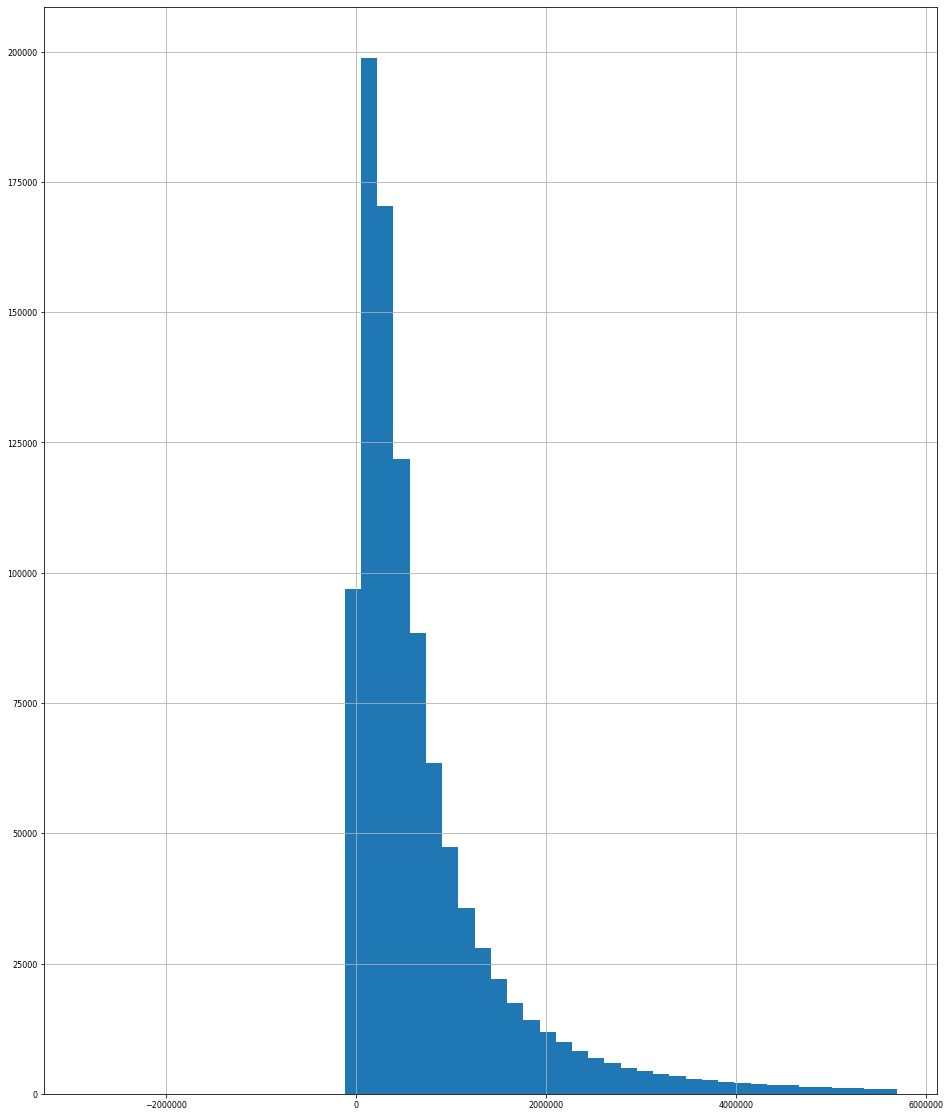

In [28]:
## plot hist of gasto_familiar in range +/- 2stdev
limH = np.average(y) + 2*np.std(y)
limL = np.average(y) - 2*np.std(y)
ix = df['gasto_familiar'].between(limL, limH, inclusive=False)
df['gasto_familiar'][ ix ].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# -----------------------------------

In [5]:
import numpy as np
import pandas as pd

# whole dataset
input_file_header = './header.txt'
input_folder = './../Data/Dataton_train/'
input_file_data = 'Dataton_train_semicolon.csv'

headers = pd.read_csv( input_folder + input_file_header , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

# reading data
totalData = 0
for df in pd.read_csv(input_folder + input_file_data, header = None,  names=headers, sep=';', iterator=True, chunksize=1000000):
    totalData += len(df)
    break
#
print(totalData)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,11,29,30,32,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1000000


In [12]:
# unique values by variable
for col in df:
    print('> {} : {}'.format(col , df[col].unique() ))

> periodo : [201908 201909 201907 201903 201911 201904 201905 202002 202009 202010
 202005 202008 202011 202003 202007 202001 201910 202004 201902]
> id_cli : [2089776 2088434 2088089 ... 1971788 8472843  822415]
> fecha_nacimiento : [19840630 19880109 19860727 ... 19501106 19550408 19520323]
> edad : [35.058179329226554 35.143052703627646 34.96235455167693 ... 65.535934
 35.676934 55.12115]
> genero : ['M' 'F' ' ']
> estado_civil : ['DIVORCIADO' 'UNION LIBRE' 'SOLTERO' 'NO INFORMA' 'CASADO' 'VIUDO' '\\N'
 'OTRO']
> nivel_academico : ['TECNOLOGO' 'UNIVERSITARIO' 'NO INFORMA' 'BACHILLER' 'SIN INFORMACION'
 'ESPECIALIZACION' 'PRIMARIO' 'NINGUNO']
> profesion : ['TECNOLOGIA SISTEMAS' 'VETERINARIA' '\\N' 'OTROS' 'DISEÑO Y PUBLICIDAD'
 'COMUNICACION SOCIAL' 'INGENIERIA DE PETROLEOS' 'ADMINISTRACION'
 'DERECHO' 'PSICOLOGIA' 'BACTERIOLOGIA' 'INGENIERO METALURGICO'
 'INGENIERO' 'INGENIERIA DE SISTEMAS' 'ODONTOLOGIA'
 'INGENIERIA INDUSTRIAL' 'TECNOLOGIA ELECTRICIDAD' 'CONTADURIA' 'NINGUNA'
 'ED

> rechazo_credito : ['\\N' 'RECHAZO BIZAGI' 'RECHAZO BANCO' 'RECHAZO SUFI' 'RECHAZO FACTORING']
> mora_max : ['\\N' '3' '0' '1' '28' '16' '14' '13' '12' '8' '2' '108' '47' '77' '9'
 '17' '7' '10' '15' '37' '5' '59' '70' '40' '26' '20' '24' '4' '29' '31'
 '27' '22' '268' '238' '148' '58' '178' '118' '208' '6' '46' '227' '212'
 '19' '21' '60' '30' '25' '11' '90' '39' '18' '34' '105' '75' '179' '48'
 '76' '88' '414' '442' '74' '349' '314' '196' '221' '380' '136' '255'
 '167' '106' '134' '103' '149' '209' '57' '117' '44' '32' '61' '283' '43'
 '163' '223' '253' '193' '73' '133' '45' '80' '119' '85' '55' '82' '120'
 '87' '33' '628' '248' '94' '214' '38' '180' '210' '23' '79' '89' '35'
 '239' '65' '127' '158' '97' '56' '86' '36' '104' '142' '122' '153' '95'
 '96' '41' '49' '84' '71' '144' '42' '100' '132' '224' '194' '50' '165'
 '135' '245' '211' '92' '64' '68' '187' '91' '234' '54' '156' '130' '182'
 '152' '137' '66' '197' '62' '52' '111' '164' '344' '83' '195' '169' '138'
 '107' '199' '166'

In [11]:
# df.profesion.value_counts()
df.profesion.nunique()

88

# Análisis de únicamente: periodo', 'gasto_familiar, ingreso_final

In [1]:
import numpy as np
import pandas as pd

headers = pd.read_csv( './../Data/Dataton_train/header.txt' , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

fieldsToSelect = ['periodo', 'ingreso_final' , 'gasto_familiar']

df = pd.read_csv('./../Data/Dataton_train/Dataton_train_semicolon.csv',
                 header = None,  names=headers, sep=';', #iterator=True, chunksize=1000000,
                 skipinitialspace=True, usecols=fieldsToSelect)
# See the keys
print( df.keys() )

Index(['periodo', 'ingreso_final', 'gasto_familiar'], dtype='object')


In [17]:
print(df.gasto_familiar.median())
print( df.periodo.min() )
print( df.periodo.max() )

201902
202011


In [25]:
ix1 = df['gasto_familiar'].between(201904, 201907, inclusive=True)
ix2 = df['gasto_familiar'].between(202004, 202007, inclusive=True)
print( df.gasto_familiar[ix1].median() )
print( df.gasto_familiar[ix2].median() )
print( df.gasto_familiar[ix1].median() - df.gasto_familiar[ix2].median() )

201905.39
202005.0
-99.60999999998603


Período: desde abril hasta noviembre:
- Prepandemia (2019): 201908
- Pandemia (2020): 202009
- Gasto subió en 100cop

Período: desde abril hasta julio (cierre total del país):
- Prepandemia (2019): 201905
- Pandemia (2020): 202005
- Gasto subió en 99cop

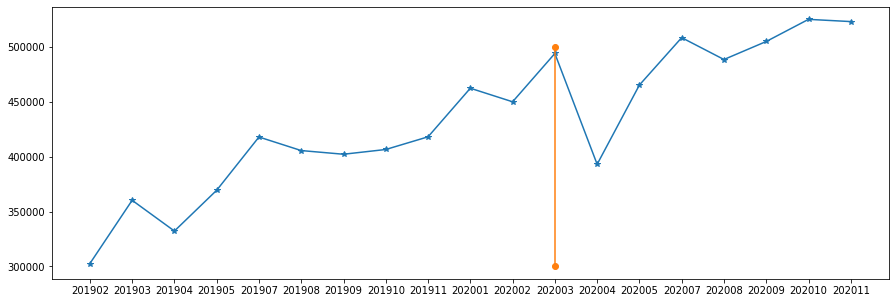

In [75]:
# plotting gasto_familiar

import matplotlib.pyplot as plt

periodos = df.groupby(['periodo'])
medianas = periodos.median()

# list of integers to string
string_periodos = [str(int) for int in list(periodos.groups.keys())]

plt.figure(figsize=(15,5))
plt.plot( string_periodos , medianas , '-*')
plt.plot( ['202003', '202003'] , [300000, 500000], '-o')
plt.show()

In [31]:
# ingrso_final: object values i.e. string, to float
df['ingreso_final'] = df['ingreso_final'].replace(pd.NA, np.nan, regex=False)
df.ingreso_final = pd.to_numeric( df.ingreso_final , downcast = 'float' )
df.info()

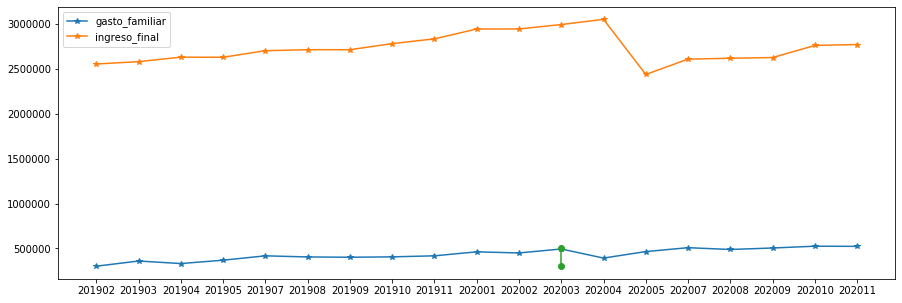

In [49]:
# plotting ingreso_final and gasto_familiar

import matplotlib.pyplot as plt

periodos = df.groupby(['periodo'])
medianasGF = periodos['gasto_familiar'].median()
medianasIF = periodos['ingreso_final'].median()

# list of integers to string
string_periodos = [str(int) for int in list(periodos.groups.keys())]

plt.figure(figsize=(15,5))
plt.plot( string_periodos , medianasGF , '-*', label='gasto_familiar')
plt.plot( string_periodos , medianasIF , '-*', label='ingreso_final')
plt.plot( ['202003', '202003'] , [300000, 500000], '-o')
plt.legend()
plt.show()

In [64]:
rateGF = df.gasto_familiar / df.ingreso_final
print( rateGF.min() )
print( rateGF.max() )

-85.60074074074075
inf


In [65]:
df.corr()

,periodo,ingreso_final,gasto_familiar
periodo,1.000000,0.008262,0.033711
ingreso_final,0.008262,1.000000,0.163788
gasto_familiar,0.033711,0.163788,1.000000


# Analizando ingresos

In [1]:
import numpy as np
import pandas as pd

headers = pd.read_csv( './../Data/Dataton_train/header.txt' , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

fieldsToSelect = ['periodo', 'gasto_familiar', 'cat_ingreso'] # ,'ingreso_final', 'ingreso_nomina', 'ingreso_nompen' ,'ingreso_segurida_social']

df = pd.read_csv('./../Data/Dataton_train/Dataton_train_semicolon.csv',
                 header = None,  names=headers, sep=';', #iterator=True, chunksize=1000000,
                 skipinitialspace=True, usecols=fieldsToSelect)
# See the keys
print( df.keys() )

Index(['periodo', 'cat_ingreso', 'gasto_familiar'], dtype='object')


In [18]:
df.gasto_familiar[df.gasto_familiar<0] = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   periodo                  int64  
 1   ingreso_nompen           float32
 2   cat_ingreso              object 
 3   ingreso_final            float32
 4   ingreso_nomina           float32
 5   ingreso_segurida_social  float32
 6   gasto_familiar           float64
dtypes: float32(4), float64(1), int64(1), object(1)
memory usage: 800.7+ MB


In [13]:
# limpieza de datos
df['gasto_familiar'][df.gasto_familiar<0] = 0

var = df['ingreso_final']
var = var.replace('\\N', np.nan, regex=False)
df['ingreso_final'] = pd.to_numeric( var , downcast = 'float' )

var = df['ingreso_segurida_social']
var = var.replace('\\N', np.nan, regex=False)
df['ingreso_segurida_social'] = pd.to_numeric( var , downcast = 'float' )

var = df['ingreso_nompen']
var = var.replace('\\N', np.nan, regex=False)
df['ingreso_nompen'] = pd.to_numeric( var , downcast = 'float' )

var = df['ingreso_nomina']
var = var.replace('\\N', np.nan, regex=False)
df['ingreso_nomina'] = pd.to_numeric( var , downcast = 'float' )

In [20]:
df.corr()

,periodo,ingreso_nompen,ingreso_final,ingreso_nomina,ingreso_segurida_social,gasto_familiar
periodo,1.000000,-0.008950,0.008262,0.078224,-0.050313,0.033711
ingreso_nompen,-0.008950,1.000000,0.071569,0.840775,0.458380,0.045158
ingreso_final,0.008262,0.071569,1.000000,0.627848,0.311168,0.163788
ingreso_nomina,0.078224,0.840775,0.627848,1.000000,0.719871,0.165195
ingreso_segurida_social,-0.050313,0.458380,0.311168,0.719871,1.000000,0.107266
gasto_familiar,0.033711,0.045158,0.163788,0.165195,0.107266,1.000000


In [38]:
any( df['ingreso_final']<0 )

False

In [26]:
df.min()

periodo                         201902
ingreso_nompen                       0
cat_ingreso                        NOM
ingreso_final                        0
ingreso_nomina                       1
ingreso_segurida_social              0
gasto_familiar            -1.15561e+08
dtype: object

# > Completar los datos referentes a mora:

In [1]:
import numpy as np
import pandas as pd

headers = pd.read_csv( './../Data/Dataton_train/header.txt' , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

fieldsToSelect = ['periodo', 'id_cli', 'ind_mora_vigente', 'mora_max', 'cant_moras_90_ult_12_meses', 
                  'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf', 'gasto_familiar']

fieldsToSelect = ['periodo', 'id_cli', 'cant_moras_90_ult_12_meses']

df = pd.read_csv('./../Data/Dataton_train/Dataton_train_semicolon.csv',
                 header = None,  names=headers, sep=';', #iterator=True, chunksize=1000000,
                 skipinitialspace=True, usecols=fieldsToSelect)

# See the keys
print( df.keys() )
print( df.info() )

Index(['periodo', 'id_cli', 'cant_moras_90_ult_12_meses'], dtype='object')


In [ ]:
# limpieza nulos
df['gasto_familiar'][df.gasto_familiar<0] = 0

# numerical variables
VAR = 'ingreso_final'
dataVAR = df[VAR].replace('\\N', np.nan, regex=False)
df[VAR] = pd.to_numeric( dataVAR , downcast = 'float' )
df[VAR] = df[VAR].clip(lower = 0) # replacing negative values by zero

# categorical variables
VAR = 'ind_mora_vigente'
df[VAR] = df[VAR].replace('N', 0, regex=False)
df[VAR] = df[VAR].replace('S', 1, regex=False)
df[VAR] = df[VAR].replace('\\N', np.nan, regex=False)


In [ ]:
# v2
# inSeries has to be inputted in ascendent order
def take_first_back_or_zero(inGroup):
    wrongData = inGroup[ np.isnan(inGroup) ]
    k = 0
    for index,value in wrongData.iteritems():
        backData = inGroup.iloc[ 0:inGroup.index.get_loc(index) ]
        if backData.empty:
            inGroup.loc[ index ] = 0
#             out[k,:] = np.array([index , 0])
        else:
            inGroup.loc[ index ] = backData.iloc[-1]
#             out[k,:] = np.array([index , backData.iloc[-1]])
#         k += 1
    return inGroup

# tardó 40mins para la variable VAR = 'mora_max'

In [ ]:
VAR = 'cant_moras_90_ult_12_meses'
wrongCli = df[ np.isnan(df[VAR]) ]['id_cli'].unique()
newDataVAR = df[df.id_cli.isin( wrongCli ) ].sort_values(by='periodo').groupby('id_cli')[VAR].apply(take_first_back_or_zero)
# assing new values to original dataframe
df.iloc[newDataVAR.index.values , df.columns.get_loc(VAR) ] = newDataVAR.values

# > Variables categóricas a numéricas basado en fecha pandemia y mediana de gasto_familiar:

In [1]:
import numpy as np
import pandas as pd

headers = pd.read_csv( './../Data/Dataton_train/header.txt' , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

fieldsToSelect = ['periodo', 'gasto_familiar']

df = pd.read_csv('./../Data/Dataton_train/Dataton_train_semicolon.csv',
                 header = None,  names=headers, sep=';', #iterator=True, chunksize=1000000,
                 skipinitialspace=True, usecols=fieldsToSelect, na_values='\\N')

# See the keys
print( df.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 2 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         int64  
 1   gasto_familiar  float64
dtypes: float64(1), int64(1)
memory usage: 320.3 MB
None


## ( ) cat_ingreso
## ( ) 

In [34]:
# removing last variables
df.drop('cat_ingreso', inplace=True, axis=1)

In [35]:
import numpy as np
import pandas as pd

headers = pd.read_csv( './../Data/Dataton_train/header.txt' , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

VAR = ['cat_ingreso']

df[ VAR[0] ] = pd.read_csv('./../Data/Dataton_train/Dataton_train_semicolon.csv',
                 header = None,  names=headers, sep=';', #iterator=True, chunksize=1000000,
                 skipinitialspace=True, usecols=VAR, na_values='\\N')

VAR = VAR[0]

In [38]:
# categorical values
df[VAR].unique()

array(['NOM', nan, 'PEN', 'NOM PEN'], dtype=object)

**Vamos a hacer un análisis de cada variable categórica en dos etapas: prepandemia y pospandemia:**

In [ ]:
def cat_to_num_by_pandemia(dataframe):
    # > prepandemia:

    medianaGF_ac = dataframe[dataframe.periodo < fecha_pandemia ].gasto_familiar.median()
    print(medianaGF_ac)

    # # getting new values for each category
    medianaVAR = dataframe[dataframe.periodo < fecha_pandemia ].groupby(VAR)['gasto_familiar'].median()
    rangoVAR =  np.abs(medianaVAR.max()) - np.abs(medianaVAR.min())
    newCat = ( medianaVAR - medianaGF_ac ) / (rangoVAR)
    print(newCat)

    # replacing new values
    ix = dataframe[ dataframe['periodo'] < (fecha_pandemia) ].index.values
    dataframe.loc[ix] = dataframe.loc[ ix ].replace( { VAR : dict(newCat) } )

    # > pospandemia:

    medianaGF_dc = dataframe[dataframe.periodo >= fecha_pandemia ].gasto_familiar.median()
    print(medianaGF_dc)

    # getting new values for each category
    medianaVAR = dataframe[dataframe.periodo >= fecha_pandemia ].groupby(VAR)['gasto_familiar'].median()
    rangoVAR =  np.abs(medianaVAR.max()) - np.abs(medianaVAR.min())
    newCat = ( medianaVAR - medianaGF_ac ) / (rangoVAR)
    print(newCat)

    # replacing new values
    ix = dataframe[ dataframe['periodo'] >= (fecha_pandemia) ].index.values
    dataframe.loc[ix] = dataframe.loc[ ix ].replace( { VAR : dict(newCat) } )
    
    return dataframe

In [ ]:
fecha_pandemia = 202004
df = cat_to_num_by_pandemia(df)

In [51]:
# save new data into new file
output_folder = './../Data/DataCleaned/'
compression_opts = dict(method='zip', archive_name = VAR + '.csv')  

df[VAR].to_csv( output_folder + VAR + '.zip', sep=';', header = True, index=False, compression=compression_opts) 

print('listo: {}'.format(VAR) )

listo: cat_ingreso


# ingreso_total: A = D, si no B, si no C ?
# (x)  A- ingreso_final
# (x)  B- ingreso_nomina
# (x)  C- ingreso_segurida_social
# (x)  D- ingreso_nompen
# ( )  E- mediana_nom3
# ( )  F- mediana_pen3

In [31]:
# v2
# inSeries has to be inputted in ascendent order
def take_first_back_or_zero(inGroup):
    wrongData = inGroup[ np.isnan(inGroup) ]
    k = 0
    for index,value in wrongData.iteritems():
        backData = inGroup.iloc[ 0:inGroup.index.get_loc(index) ]
        if backData.empty:
            inGroup.loc[ index ] = 0
#             out[k,:] = np.array([index , 0])
        else:
            inGroup.loc[ index ] = backData.iloc[-1]
#             out[k,:] = np.array([index , backData.iloc[-1]])
#         k += 1
    return inGroup

# tardó 40mins para la variable VAR = 'mora_max'

In [32]:
def first_back_or_zero(dataframe):
    # replacing np.nan for last value or zero
    wrongCli = dataframe[ np.isnan(df[VAR]) ]['id_cli'].unique()
    newDataVAR = dataframe[dataframe.id_cli.isin( wrongCli ) ].sort_values(by='periodo').groupby('id_cli')[VAR].apply(take_first_back_or_zero)

    # assing new values to original dataframe
    dataframe.iloc[newDataVAR.index.values , dataframe.columns.get_loc(VAR) ] = newDataVAR.values
    return dataframe

In [2]:
def tofloat_and_no_negatives(dataframe):
# data cleansing: null to np.nan
    dataframe[VAR] = pd.to_numeric( dataframe[VAR] , downcast = 'float' )

    # triming negative values
    dataframe[VAR] = dataframe[VAR].clip(lower = 0)
    return dataframe

In [1]:
import numpy as np
import pandas as pd

headers = pd.read_csv( './../Data/Dataton_train/header.txt' , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

fieldsToSelect = ['periodo', 'id_cli', 'ingreso_final', 'ingreso_nomina', 'ingreso_segurida_social',
                  'ingreso_nompen']

df = pd.read_csv('./../Data/Dataton_train/Dataton_train_semicolon.csv',
                 header = None,  names=headers, sep=';', #iterator=True, chunksize=1000000,
                 skipinitialspace=True, usecols=fieldsToSelect, na_values='\\N')

# See the keys
print( df.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 6 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   periodo                  int64  
 1   id_cli                   int64  
 2   ingreso_nompen           float64
 3   ingreso_final            float64
 4   ingreso_nomina           float64
 5   ingreso_segurida_social  float64
dtypes: float64(4), int64(2)
memory usage: 960.8 MB
None


In [3]:
# data cleansing:
VAR = 'ingreso_final'
df = tofloat_and_no_negatives( df )

VAR = 'ingreso_nomina'
df = tofloat_and_no_negatives( df )

VAR = 'ingreso_segurida_social'
df = tofloat_and_no_negatives( df )

VAR = 'ingreso_nompen'
df = tofloat_and_no_negatives( df )

In [8]:
# datos que se pueden llenar
newdata = ( 
    ~np.isnan( df['ingreso_final'] ) | 
#     ~np.isnan( df['ingreso_nompen'] ) |
    ~np.isnan( df['ingreso_nomina'] ) |
    ~np.isnan( df['ingreso_segurida_social'] ) 
)

# van a quedar solo 105.916 datos en nulos
len( newdata[newdata==False] )

105916

> (x) qué tanto se correlaciona ingreso_nompen con ingreso_nomina en los valores != en nompen
<br>--> tienen una correlación de 87%

In [9]:
df[ df['ingreso_nompen']!=0 ][['ingreso_nompen', 'ingreso_nomina']].corr()

,ingreso_nompen,ingreso_nomina
ingreso_nompen,1.00000,0.87288
ingreso_nomina,0.87288,1.00000


entonces nompen en cero serán nan:

In [10]:
df.loc[ df['ingreso_nompen']==0 , 'ingreso_nompen'] = np.nan

In [11]:
# datos que se pueden llenar
newdata = ( 
    ~np.isnan( df['ingreso_final'] ) | 
    ~np.isnan( df['ingreso_nompen'] ) |
    ~np.isnan( df['ingreso_nomina'] ) |
    ~np.isnan( df['ingreso_segurida_social'] ) 
)
# van a quedar solo 105.516 datos en nulos
len( newdata[newdata==False] )

105516

In [15]:
# 1 - select values from ingreso_final
df[ 'ingreso_total' ] = df['ingreso_final']
df

,periodo,id_cli,ingreso_nompen,ingreso_final,ingreso_nomina,ingreso_segurida_social,ingreso_total
0,201908,2089776,1255032.0,1173431.0,1255032.0,NaN,1173431.0
1,201909,2089776,1255032.0,1173431.0,1255032.0,NaN,1173431.0
2,201907,2089776,1255032.0,1172612.0,1255032.0,NaN,1172612.0
3,201903,2089776,1282673.0,1172612.0,1172612.0,NaN,1172612.0
4,201911,2089776,1255032.0,1355032.0,1255032.0,NaN,1355032.0
...,...,...,...,...,...,...,...
20988743,201910,2090044,NaN,2438000.0,NaN,NaN,2438000.0
20988744,202002,2090044,NaN,2438000.0,NaN,NaN,2438000.0
20988745,201903,2090044,NaN,2300000.0,NaN,NaN,2300000.0
20988746,202001,2090044,NaN,2438000.0,NaN,NaN,2438000.0


In [23]:
# 2- fill nan values with ingreso_nompen without including values in 0
df.loc[ df['ingreso_nompen']==0 , 'ingreso_nompen'] = np.nan

nan_index = df[ np.isnan( df['ingreso_total'] ) ].index
df.loc[ nan_index , 'ingreso_total' ] = df.loc[ nan_index , 'ingreso_nompen' ]

In [25]:
# 3- select values from ingreso_nomina
nan_index = df[ np.isnan( df['ingreso_total'] ) ].index
df.loc[ nan_index , 'ingreso_total' ] = df.loc[ nan_index , 'ingreso_nomina' ]

In [26]:
# 4- fill nan values with ingreso_segurida_social
nan_index = df[ np.isnan( df['ingreso_total'] ) ].index
df.loc[ nan_index , 'ingreso_total' ] = df.loc[ nan_index , 'ingreso_segurida_social' ]

In [30]:
# total resting nulls
len( df[ np.isnan( df['ingreso_total'] ) ].index )

105516

In [33]:
VAR = 'ingreso_total'
df = first_back_or_zero(df)

In [34]:
# save new data into new file
output_folder = './../Data/DataCleaned/'
compression_opts = dict(method='zip', archive_name = VAR + '.csv')  

df[VAR].to_csv( output_folder + VAR + '.zip', sep=';', header = True, index=False, compression=compression_opts) 

print('listo: {}'.format(VAR) )

listo: ingreso_total


In [35]:
df.corr()

,periodo,id_cli,ingreso_nompen,ingreso_final,ingreso_nomina,ingreso_segurida_social,ingreso_total
periodo,1.000000,0.004622,0.000321,0.008262,0.078224,-0.050313,0.008338
id_cli,0.004622,1.000000,0.011192,0.015430,-0.028226,0.004838,0.015449
ingreso_nompen,0.000321,0.011192,1.000000,0.462465,0.872880,0.652417,0.462541
ingreso_final,0.008262,0.015430,0.462465,1.000000,0.627848,0.311168,1.000000
ingreso_nomina,0.078224,-0.028226,0.872880,0.627848,1.000000,0.719871,0.627878
ingreso_segurida_social,-0.050313,0.004838,0.652417,0.311168,0.719871,1.000000,0.312729
ingreso_total,0.008338,0.015449,0.462541,1.000000,0.627878,0.312729,1.000000


In [43]:
print( len( df[ np.isnan( df['ingreso_final'] ) ].index ) )
print( any(df['ingreso_total'] != df['ingreso_final']) )

154051
True


ingreso_total se genera apartir de las sgtes variables en orden de prioridad. Se muestran sus respectivos valores de correlación:
- ingreso_total = 
 0. ingreso_final ( 1.00 )
 1. ingreso_nompen *(valores en cero se transforman en np.nan) ( 0.46 )
 2. ingreso_nomina ( 0.62 )
 3. ingreso_segurida_social ( 0.31 )
<br>Note: Despute ingreso_final has a corr of 1.0 with ingreso_total. They have 154.051 different values

# (x) ¿qué tanto se parece ind con ingreso_total ?
--> tienen una correlación de 0.16, entonces las vamos a dejar a ambas

In [44]:
import numpy as np
import pandas as pd

VAR = ['ind']


headers = pd.read_csv( './../Data/Dataton_train/header.txt' , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

df[ VAR[0] ] = pd.read_csv('./../Data/Dataton_train/Dataton_train_semicolon.csv',
                 header = None,  names=headers, sep=';', #iterator=True, chunksize=1000000,
                 skipinitialspace=True, usecols=VAR, na_values='\\N')

In [45]:
df[ ['ind' , 'ingreso_total'] ].corr()

,ind,ingreso_total
ind,1.000000,0.168956
ingreso_total,0.168956,1.000000


In [50]:
# analizar:
## ( ) cupo_total_tc
## ( ) tenencia_tc
## ( ) cuota_tc_bancolombia
## ( ) cuota_tarjeta_de_credito
## ( ) cupo_tc_mdo
## ( ) cuota_tc_mdo

In [51]:
import numpy as np
import pandas as pd

VAR = ['ind']
VAR = [
    'cupo_total_tc',
    'tenencia_tc',
    'cuota_tc_bancolombia',
    'cuota_tarjeta_de_credito',
    'cupo_tc_mdo',
    'cuota_tc_mdo'
    ]

headers = pd.read_csv( './../Data/Dataton_train/header.txt' , sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

df2 = pd.read_csv('./../Data/Dataton_train/Dataton_train_semicolon.csv',
                 header = None,  names=headers, sep=';', #iterator=True, chunksize=1000000,
                 skipinitialspace=True, usecols=VAR, na_values='\\N')

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 6 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   cupo_total_tc             float64
 1   tenencia_tc               object 
 2   cuota_tc_bancolombia      float64
 3   cuota_tarjeta_de_credito  int64  
 4   cupo_tc_mdo               int64  
 5   cuota_tc_mdo              int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 960.8+ MB


In [55]:
df2['tenencia_tc'].unique()

array(['NO', 'SI'], dtype=object)

In [57]:
df2.replace({'tenencia_tc': {'NO': 0, 'SI': 1}})

,cupo_total_tc,tenencia_tc,cuota_tc_bancolombia,cuota_tarjeta_de_credito,cupo_tc_mdo,cuota_tc_mdo
0,0.0,0,0.000000e+00,0,0,0
1,0.0,0,0.000000e+00,0,0,0
2,0.0,0,0.000000e+00,0,0,0
3,0.0,0,0.000000e+00,0,0,0
4,0.0,0,0.000000e+00,0,0,0
...,...,...,...,...,...,...
20988743,10500000.0,1,1.350093e+06,533000,1900000,0
20988744,10500000.0,1,2.409468e+05,1178000,1900000,0
20988745,10500000.0,1,4.515000e+05,0,0,0
20988746,10500000.0,1,2.477824e+05,1178000,1900000,0


In [59]:
df2.corr()

,cupo_total_tc,cuota_tc_bancolombia,cuota_tarjeta_de_credito,cupo_tc_mdo,cuota_tc_mdo
cupo_total_tc,1.000000,0.659596,0.188772,0.185660,0.022279
cuota_tc_bancolombia,0.659596,1.000000,0.200155,0.126249,0.029862
cuota_tarjeta_de_credito,0.188772,0.200155,1.000000,0.779846,0.944235
cupo_tc_mdo,0.185660,0.126249,0.779846,1.000000,0.724649
cuota_tc_mdo,0.022279,0.029862,0.944235,0.724649,1.000000


# READING DATA FROM NEW FILES:

In [14]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join


# list all the files in the folder path in ascending order
def ls(folder_path):
    files = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    files.sort()
    return files


def concatenate_files_to_df(input_folder):
    firstTime = True
    for file in ls(input_folder):
        path_file = input_folder + file
        print(file)
        # readind the whole files
        if firstTime:
            df = pd.read_csv( path_file,
                              header = 0, sep=';', #iterator=True, chunksize=1000000,
                              skipinitialspace=True, na_values='\\N')
            firstTime = False
        else:
            # concatening to a big dataframe
            df = pd.concat([
                df, 
                pd.read_csv( path_file,
                              header = 0, sep=';', #iterator=True, chunksize=1000000,
                              skipinitialspace=True, na_values='\\N')],
                axis=1)      
    return df

In [15]:
input_folder = './../Data/DataCleaned/'
df = concatenate_files_to_df(input_folder)

cant_mora_30_tdc_ult_3m_sf.csv
dummies_t_f.csv


In [102]:
import pandas as pd
import numpy as np

input_folder = './../Data/DataCleaned/'
output_folder = './../Data/DataCleaned/'
files = [
    input_folder + 'cant_mora_30_tdc_ult_3m_sf' + '.csv',
    input_folder + 'cat_ingreso' + '.csv'
]

In [ ]:
# create empty file
nn = open(output_folder + 'datatrain.csv', 'w')
#
firstTime = True
totalData = 0
chunk_skip = 500000
chunk_rows = 500000
nIters = int( np.ceil( 20988747 / chunk_rows ) )
for n in range( nIters ):
    if firstTime:
        df1 = pd.read_csv( files[0] , header = 0, nrows=chunk_rows)
        df2 = pd.read_csv( files[1] , header = 0, nrows=chunk_rows)
        # save data
        pd.concat([
                    df1, 
                    df2],
                    axis=1).to_csv( output_folder + 'datatrain.csv', sep = ';', header = False, mode = 'a', index=False)
        totalData += chunk_rows
        firstTime = False
    else:
        if n == nIters - 1 :
            chunk_rows = 488748 # total data: 20988747
        df1 = pd.read_csv( files[0] , header = None, nrows=chunk_rows, skiprows=(n)*chunk_skip)
        df2 = pd.read_csv( files[1] , header = None, nrows=chunk_rows, skiprows=(n)*chunk_skip)
        # saving data
        pd.concat([
                    df1, 
                    df2],
                    axis=1).to_csv( output_folder + 'datatrain.csv', sep = ';', header = False, mode = 'a', index=False)
        totalData += chunk_rows
#
# header file
print(totalData)
print( 'error: {}'.format( 20988747 - totalData ))

In [122]:
df = pd.read_csv ( output_folder + 'datatrain.csv', sep = ';', header = None )
df

,0,1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
20988743,0.0,0.0
20988744,0.0,0.0
20988745,0.0,0.0
20988746,0.0,0.0


In [123]:
df4 = pd.read_csv ( files[0], sep = ';', header = 0 )
df4
# files[0]

,cant_mora_30_tdc_ult_3m_sf
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
20988743,0.0
20988744,0.0
20988745,0.0
20988746,0.0


In [128]:
index = df[ df[0] != df4['cant_mora_30_tdc_ult_3m_sf'] ].index.values

In [129]:
df.iloc[index]

,0,1
500032,0.0,0.000000
500033,2.0,0.574522
500035,0.0,0.000000
500036,2.0,0.574522
500187,0.0,0.000000
...,...,...
20987979,1.0,0.000000
20988074,0.0,0.000000
20988077,1.0,0.000000
20988210,0.0,0.000000


In [120]:
df4.iloc[index]

,cant_mora_30_tdc_ult_3m_sf
500032,2.0
500033,0.0
500035,2.0
500036,0.0
500187,3.0
...,...
20987979,0.0
20988074,1.0
20988077,0.0
20988210,1.0


In [14]:
    firstTime = True
    for df in pd.read_csv(input_folder + input_file_data, header = None, iterator=True, chunksize=1000000):
            
        # adding header names to dataframe
        df.columns = ( header_cols )

NameError: name 'input_file_data' is not defined

# multiple files for dataset using tf.Data:

In [20]:
import tensorflow as tf
from tensorflow import keras
###### code to test if gpu is on: 
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
def get_dataset(file_path):
    dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=12, # Artificially small to make examples easier to show.
      label_name=LABEL_COLUMN,
      na_value="\\N",
      num_epochs=1,
      ignore_errors=True)
    return dataset

raw_train_data = get_dataset(train_file_path)

In [ ]:
headers = pd.read_csv('/home/sas1/Documentos/dbc/header.txt', sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

df = tf.data.experimental.make_csv_dataset(
    "/home/sas1/Documentos/dbc/Dataton_train_semicolon.csv",
    column_names=headers,
    na_value='\\N',
    batch_size=5,
    num_epochs=1,
    field_delim=';'
)

df.take(1)

# merging multiple files into one:

In [1]:
import pandas as pd
import numpy as np
import os

In [32]:
def tofloat(dataframe):
    dataframe[VAR] = pd.to_numeric( dataframe[VAR] , downcast = 'float' )
    return dataframe

def tointeger(dataframe):
    dataframe[VAR] = pd.to_numeric( dataframe[VAR] , downcast = 'integer' )
    return dataframe

In [5]:
def tofloat_and_no_negatives(dataframe):
# data cleansing: null to np.nan
    dataframe[VAR] = pd.to_numeric( dataframe[VAR] , downcast = 'float' )

    # triming negative values
    dataframe[VAR] = dataframe[VAR].clip(lower = 0)
    return dataframe

In [4]:
def tointeger_and_no_negatives(dataframe):
# data cleansing: null to np.nan
    dataframe[VAR] = pd.to_numeric( dataframe[VAR] , downcast = 'integer' )

    # triming negative values
    dataframe[VAR] = dataframe[VAR].clip(lower = 0)
    return dataframe

In [5]:
headers = pd.read_csv('./../Data/header.txt', sep= ',', header=None,encoding='utf-8')
headers = headers.values.tolist()[0]

df_2 = pd.read_csv('./../Data/Dataton_train/Dataton_train_semicolon.csv', sep=';', 
    header=None, names=headers, na_values='\\N', encoding='utf-8',
    usecols=["cuota_de_consumo", "cuota_de_sector_solidario", 
             "cuota_de_vivienda", "cuota_rotativos",
             "cuota_sector_real_comercio", "cuota_tarjeta_de_credito",
             "cuota_tc_bancolombia", "cupo_total_tc", "id_cli",
             "periodo", "saldo_no_rot_mdo", "saldo_prom3_tdc_mdo"])

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   periodo                     int64  
 1   id_cli                      int64  
 2   cupo_total_tc               float64
 3   cuota_tc_bancolombia        float64
 4   cuota_de_vivienda           float64
 5   cuota_de_consumo            float64
 6   cuota_rotativos             int64  
 7   cuota_tarjeta_de_credito    int64  
 8   cuota_de_sector_solidario   int64  
 9   cuota_sector_real_comercio  int64  
 10  saldo_prom3_tdc_mdo         float64
 11  saldo_no_rot_mdo            int64  
dtypes: float64(5), int64(7)
memory usage: 1.9 GB


In [7]:
VAR = 'periodo'
df_2 = tointeger_and_no_negatives(df_2)

VAR = 'id_cli'
df_2 = tointeger_and_no_negatives(df_2)

VAR = 'cupo_total_tc'
df_2 = tofloat_and_no_negatives(df_2)

VAR = 'cuota_tc_bancolombia'
df_2 = tofloat_and_no_negatives(df_2)

VAR = 'cuota_de_vivienda'
df_2 = tofloat_and_no_negatives(df_2)

VAR = 'cuota_de_consumo'
df_2 = tofloat_and_no_negatives(df_2)

VAR = 'cuota_rotativos'
df_2 = tointeger_and_no_negatives(df_2)

VAR = 'cuota_tarjeta_de_credito'
df_2 = tointeger_and_no_negatives(df_2)

VAR = 'cuota_de_sector_solidario'
df_2 = tointeger_and_no_negatives(df_2)

VAR = 'cuota_sector_real_comercio'
df_2 = tointeger_and_no_negatives(df_2)

VAR = 'saldo_prom3_tdc_mdo'
df_2 = tofloat_and_no_negatives(df_2)

VAR = 'saldo_no_rot_mdo'
df_2 = tointeger_and_no_negatives(df_2)

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 12 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   periodo                     int32  
 1   id_cli                      int32  
 2   cupo_total_tc               float32
 3   cuota_tc_bancolombia        float32
 4   cuota_de_vivienda           float32
 5   cuota_de_consumo            float32
 6   cuota_rotativos             int32  
 7   cuota_tarjeta_de_credito    int64  
 8   cuota_de_sector_solidario   int64  
 9   cuota_sector_real_comercio  int64  
 10  saldo_prom3_tdc_mdo         float32
 11  saldo_no_rot_mdo            int64  
dtypes: float32(5), int32(3), int64(4)
memory usage: 1.3 GB


In [9]:
## este código sobrecarga la memoria
## no idea por qué

# all_files = os.listdir('./../Data/DataCleaned/')
# df = pd.concat( ( pd.read_csv('./../Data/DataCleaned/' + f) for f in all_files ) )

In [10]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join


# list all the files in the folder path in ascending order
def ls(folder_path):
    files = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]
    files.sort()
    return files


def concatenate_files_to_df(input_folder):
    firstTime = True
    for file in ls(input_folder):
        path_file = input_folder + file
        print(file)
        # readind the whole files
        if firstTime:
            df = pd.read_csv( path_file,
                              header = 0, sep=';', #iterator=True, chunksize=1000000,
                              skipinitialspace=True, na_values='\\N')
            firstTime = False
        else:
            # concatening to a big dataframe
            df = pd.concat([
                df, 
                pd.read_csv( path_file,
                              header = 0, sep=';', #iterator=True, chunksize=1000000,
                              skipinitialspace=True, na_values='\\N')],
                axis=1)      
    return df

In [11]:
input_folder = './../Data/DataCleaned/'
df = concatenate_files_to_df(input_folder)

cant_mora_30_consum_ult_3m_sf.csv
cant_mora_30_tdc_ult_3m_sf.csv
cant_moras_90_ult_12_meses.csv
cant_oblig_tot_sf.csv
cat_ingreso.csv
categoria.csv
ctas_activas.csv
ctas_embargadas.csv
dummies_t_f.csv
ind.csv
ingreso_total.csv
mora_max.csv
nro_tot_cuentas.csv
prepandemia.csv
tipo_vivienda.csv


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 20 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   cant_mora_30_consum_ult_3m_sf  float64
 1   cant_mora_30_tdc_ult_3m_sf     float64
 2   cant_moras_90_ult_12_meses     float64
 3   cant_oblig_tot_sf              float64
 4   cat_ingreso                    float64
 5   categoria                      float64
 6   ctas_activas                   float64
 7   ctas_embargadas                float64
 8   rechazo_credito                int64  
 9   tiene_ctas_embargadas          int64  
 10  tiene_consumo                  int64  
 11  tiene_crediagil                int64  
 12  convenio_lib                   int64  
 13  tiene_ctas_activas             int64  
 14  ind                            float64
 15  ingreso_total                  float64
 16  mora_max                       float64
 17  nro_tot_cuentas                float64
 18  

In [13]:
# floats
VAR = 'cant_mora_30_consum_ult_3m_sf'
df = tofloat(df)

VAR = 'cant_mora_30_tdc_ult_3m_sf'
df = tofloat(df)

VAR = 'cant_moras_90_ult_12_meses'
df = tofloat(df)

VAR = 'cant_oblig_tot_sf'
df = tofloat(df)

VAR = 'cat_ingreso'
df = tofloat(df)

VAR = 'categoria'
df = tofloat(df)

VAR = 'ctas_activas'
df = tofloat(df)

VAR = 'ctas_embargadas'
df = tofloat(df)

VAR = 'ind'
df = tofloat(df)

VAR = 'ingreso_total'
df = tofloat(df)

VAR = 'mora_max'
df = tofloat(df)

VAR = 'nro_tot_cuentas'
df = tofloat(df)

VAR = 'tipo_vivienda'
df = tofloat(df)

# integers

VAR = 'rechazo_credito'
df = tointeger(df)

VAR = 'tiene_ctas_embargadas'
df = tointeger(df)

VAR = 'tiene_consumo'
df = tointeger(df)

VAR = 'tiene_crediagil'
df = tointeger(df)

VAR = 'convenio_lib'
df = tointeger(df)

VAR = 'tiene_ctas_activas'
df = tointeger(df)

VAR = 'prepandemia'
df = tointeger(df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 20 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   cant_mora_30_consum_ult_3m_sf  float32
 1   cant_mora_30_tdc_ult_3m_sf     float32
 2   cant_moras_90_ult_12_meses     float32
 3   cant_oblig_tot_sf              float32
 4   cat_ingreso                    float32
 5   categoria                      float32
 6   ctas_activas                   float32
 7   ctas_embargadas                float32
 8   rechazo_credito                int8   
 9   tiene_ctas_embargadas          int8   
 10  tiene_consumo                  int8   
 11  tiene_crediagil                int8   
 12  convenio_lib                   int8   
 13  tiene_ctas_activas             int8   
 14  ind                            float32
 15  ingreso_total                  float32
 16  mora_max                       float32
 17  nro_tot_cuentas                float32
 18  

In [15]:
# df.append(df_2, ignore_index=True)
#
df = pd.concat( [ df, df_2 ], axis=1) 

In [16]:
df.to_csv('./../Data/DataCleaned/data_cleaned.csv', sep=';', header = True, index=False)

## appending codigo_ciiu:

In [19]:
df_3 = pd.read_csv( './../Data/DataCleaned_backup/codigo_ciiu.csv',
                              header = 0, sep=';', #iterator=True, chunksize=1000000,
                              skipinitialspace=True, na_values='\\N')

In [20]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 20 columns):
 #   Column         Dtype
---  ------         -----
 0   codigo_ciiu_A  int64
 1   codigo_ciiu_C  int64
 2   codigo_ciiu_D  int64
 3   codigo_ciiu_E  int64
 4   codigo_ciiu_F  int64
 5   codigo_ciiu_G  int64
 6   codigo_ciiu_H  int64
 7   codigo_ciiu_I  int64
 8   codigo_ciiu_J  int64
 9   codigo_ciiu_K  int64
 10  codigo_ciiu_L  int64
 11  codigo_ciiu_M  int64
 12  codigo_ciiu_N  int64
 13  codigo_ciiu_O  int64
 14  codigo_ciiu_P  int64
 15  codigo_ciiu_Q  int64
 16  codigo_ciiu_R  int64
 17  codigo_ciiu_S  int64
 18  codigo_ciiu_T  int64
 19  codigo_ciiu_U  int64
dtypes: int64(20)
memory usage: 3.1 GB


In [28]:
for VAR in df_3.columns.values:
    df_3 = tointeger(df_3)

In [29]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 20 columns):
 #   Column         Dtype
---  ------         -----
 0   codigo_ciiu_A  int8 
 1   codigo_ciiu_C  int8 
 2   codigo_ciiu_D  int8 
 3   codigo_ciiu_E  int8 
 4   codigo_ciiu_F  int8 
 5   codigo_ciiu_G  int8 
 6   codigo_ciiu_H  int8 
 7   codigo_ciiu_I  int8 
 8   codigo_ciiu_J  int8 
 9   codigo_ciiu_K  int8 
 10  codigo_ciiu_L  int8 
 11  codigo_ciiu_M  int8 
 12  codigo_ciiu_N  int8 
 13  codigo_ciiu_O  int8 
 14  codigo_ciiu_P  int8 
 15  codigo_ciiu_Q  int8 
 16  codigo_ciiu_R  int8 
 17  codigo_ciiu_S  int8 
 18  codigo_ciiu_T  int8 
 19  codigo_ciiu_U  int8 
dtypes: int8(20)
memory usage: 400.3 MB


In [30]:
df = pd.concat( [ df, df_3 ], axis=1) 

# adding gasto_familiar to data_cleaned.csv:

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./../Data/DataCleaned/data_cleaned.csv', sep=';', header = 0, nrows = 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cant_mora_30_consum_ult_3m_sf  2 non-null      float64
 1   cant_mora_30_tdc_ult_3m_sf     2 non-null      float64
 2   cant_moras_90_ult_12_meses     2 non-null      float64
 3   cant_oblig_tot_sf              2 non-null      float64
 4   cat_ingreso                    2 non-null      float64
 5   categoria                      2 non-null      float64
 6   ctas_activas                   2 non-null      float64
 7   ctas_embargadas                2 non-null      float64
 8   rechazo_credito                2 non-null      int64  
 9   tiene_ctas_embargadas          2 non-null      int64  
 10  tiene_consumo                  2 non-null      int64  
 11  tiene_crediagil                2 non-null      int64  
 12  convenio_lib                   2 non-null      int64  

In [13]:
colnames = df.columns.values.tolist()
colnames

['cant_mora_30_consum_ult_3m_sf',
 'cant_mora_30_tdc_ult_3m_sf',
 'cant_moras_90_ult_12_meses',
 'cant_oblig_tot_sf',
 'cat_ingreso',
 'categoria',
 'ctas_activas',
 'ctas_embargadas',
 'rechazo_credito',
 'tiene_ctas_embargadas',
 'tiene_consumo',
 'tiene_crediagil',
 'convenio_lib',
 'tiene_ctas_activas',
 'ind',
 'ingreso_total',
 'mora_max',
 'nro_tot_cuentas',
 'prepandemia',
 'tipo_vivienda',
 'periodo',
 'id_cli',
 'cupo_total_tc',
 'cuota_tc_bancolombia',
 'cuota_de_vivienda',
 'cuota_de_consumo',
 'cuota_rotativos',
 'cuota_tarjeta_de_credito',
 'cuota_de_sector_solidario',
 'cuota_sector_real_comercio',
 'saldo_prom3_tdc_mdo',
 'saldo_no_rot_mdo']

In [19]:
coltypes = [np.float32 ,
 np.float32 ,
 np.float32 ,
 np.float32 ,
 np.float32 ,
 np.float32 ,
 np.float32 ,
 np.float32 ,
 np.int8 ,
 np.int8 ,
 np.int8 ,
 np.int8 ,
 np.int8 ,
 np.int8 ,
 np.float32 ,
 np.float32 ,
 np.float32 ,
 np.float32 ,
 np.int8 ,
 np.float32 ,
 np.int32 ,
 np.int32 ,
 np.float32 ,
 np.float32 ,
 np.float32 ,
 np.float32 ,
 np.int32 ,
 np.int64 ,
 np.int64 ,
 np.int64 ,
 np.float32 ,
 np.int64 ]

In [27]:
col_dtypes = dict(zip(colnames, coltypes))

In [28]:
df = pd.read_csv('./../Data/DataCleaned/data_cleaned.csv', sep=';', header = 0, dtype = col_dtypes)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 32 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   cant_mora_30_consum_ult_3m_sf  float32
 1   cant_mora_30_tdc_ult_3m_sf     float32
 2   cant_moras_90_ult_12_meses     float32
 3   cant_oblig_tot_sf              float32
 4   cat_ingreso                    float32
 5   categoria                      float32
 6   ctas_activas                   float32
 7   ctas_embargadas                float32
 8   rechazo_credito                int8   
 9   tiene_ctas_embargadas          int8   
 10  tiene_consumo                  int8   
 11  tiene_crediagil                int8   
 12  convenio_lib                   int8   
 13  tiene_ctas_activas             int8   
 14  ind                            float32
 15  ingreso_total                  float32
 16  mora_max                       float32
 17  nro_tot_cuentas                float32
 18  

In [30]:
# adding gasto_familiar
df_2 = pd.read_csv('./../Data/DataCleaned/gasto_familiar.csv', sep=';', 
    header=0, na_values='\\N', encoding='utf-8')

In [33]:
VAR = 'gasto_familiar'
df_2 = tofloat(df_2)

In [34]:
df = pd.concat( [ df, df_2 ], axis=1) 

In [35]:
df.to_csv('./../Data/DataCleaned/data_cleaned_2.csv', sep=';', header = True, index=False)

# adding gasto_familiar to data_cleaned_and_ciuu.csv:

In [47]:
df = pd.read_csv('./../Data/DataCleaned/data_cleaned_and_ciuu.csv', sep=';', header = 0, nrows = 2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cant_mora_30_consum_ult_3m_sf  2 non-null      float64
 1   cant_mora_30_tdc_ult_3m_sf     2 non-null      float64
 2   cant_moras_90_ult_12_meses     2 non-null      float64
 3   cant_oblig_tot_sf              2 non-null      float64
 4   cat_ingreso                    2 non-null      float64
 5   categoria                      2 non-null      float64
 6   ctas_activas                   2 non-null      float64
 7   ctas_embargadas                2 non-null      float64
 8   rechazo_credito                2 non-null      int64  
 9   tiene_ctas_embargadas          2 non-null      int64  
 10  tiene_consumo                  2 non-null      int64  
 11  tiene_crediagil                2 non-null      int64  
 12  convenio_lib                   2 non-null      int64  

In [48]:
colnames = df.columns.values.tolist()

In [49]:
df.dtypes.values.tolist()

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64')]

In [50]:
# formatting manually the previous result
coltypes = [ np.float32 ,
             np.float32 ,
             np.float32 ,
             np.float32 ,
             np.float32 ,
             np.float32 ,
             np.float32 ,
             np.float32 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.float32 ,
             np.float32 ,
             np.float32 ,
             np.float32 ,
             np.int8 ,
             np.float32 ,
             np.int32 ,
             np.int32 ,
             np.float32 ,
             np.float32 ,
             np.float32 ,
             np.float32 ,
             np.int32 ,
             np.int64 ,
             np.int64 ,
             np.int64 ,
             np.float32 ,
             np.int64 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8 ,
             np.int8            
           ]

In [51]:
col_dtypes = dict(zip(colnames, coltypes))

In [52]:
df = pd.read_csv('./../Data/DataCleaned/data_cleaned_and_ciuu.csv', sep=';', header = 0, dtype = col_dtypes)

In [53]:
# adding gasto_familiar
df_2 = pd.read_csv('./../Data/DataCleaned/gasto_familiar.csv', sep=';', 
    header=0, na_values='\\N', encoding='utf-8')

VAR = 'gasto_familiar'
df_2 = tofloat(df_2)

In [54]:
df = pd.concat( [ df, df_2 ], axis=1) 

In [55]:
df.to_csv('./../Data/DataCleaned/data_cleaned_and_ciuu_2.csv', sep=';', header = True, index=False)

In [56]:
col_dtypes

{'cant_mora_30_consum_ult_3m_sf': numpy.float32,
 'cant_mora_30_tdc_ult_3m_sf': numpy.float32,
 'cant_moras_90_ult_12_meses': numpy.float32,
 'cant_oblig_tot_sf': numpy.float32,
 'cat_ingreso': numpy.float32,
 'categoria': numpy.float32,
 'ctas_activas': numpy.float32,
 'ctas_embargadas': numpy.float32,
 'rechazo_credito': numpy.int8,
 'tiene_ctas_embargadas': numpy.int8,
 'tiene_consumo': numpy.int8,
 'tiene_crediagil': numpy.int8,
 'convenio_lib': numpy.int8,
 'tiene_ctas_activas': numpy.int8,
 'ind': numpy.float32,
 'ingreso_total': numpy.float32,
 'mora_max': numpy.float32,
 'nro_tot_cuentas': numpy.float32,
 'prepandemia': numpy.int8,
 'tipo_vivienda': numpy.float32,
 'periodo': numpy.int32,
 'id_cli': numpy.int32,
 'cupo_total_tc': numpy.float32,
 'cuota_tc_bancolombia': numpy.float32,
 'cuota_de_vivienda': numpy.float32,
 'cuota_de_consumo': numpy.float32,
 'cuota_rotativos': numpy.int32,
 'cuota_tarjeta_de_credito': numpy.int64,
 'cuota_de_sector_solidario': numpy.int64,
 'cuot

# reading new files:

In [1]:
import pandas as pd
import numpy as np

> data_cleaned2.csv:

- to use for tf data:

In [2]:
col_dtypes = [np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.int8,
 np.float32,
 np.int32,
 np.int32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.int32,
 np.int64,
 np.int64,
 np.int64,
 np.float32,
 np.int64,
 np.float32]

- to read with pandas:

In [3]:
col_dtypes = {'cant_mora_30_consum_ult_3m_sf': np.float32,
 'cant_mora_30_tdc_ult_3m_sf': np.float32,
 'cant_moras_90_ult_12_meses': np.float32,
 'cant_oblig_tot_sf': np.float32,
 'cat_ingreso': np.float32,
 'categoria': np.float32,
 'ctas_activas': np.float32,
 'ctas_embargadas': np.float32,
 'rechazo_credito': np.int8,
 'tiene_ctas_embargadas': np.int8,
 'tiene_consumo': np.int8,
 'tiene_crediagil': np.int8,
 'convenio_lib': np.int8,
 'tiene_ctas_activas': np.int8,
 'ind': np.float32,
 'ingreso_total': np.float32,
 'mora_max': np.float32,
 'nro_tot_cuentas': np.float32,
 'prepandemia': np.int8,
 'tipo_vivienda': np.float32,
 'periodo': np.int32,
 'id_cli': np.int32,
 'cupo_total_tc': np.float32,
 'cuota_tc_bancolombia': np.float32,
 'cuota_de_vivienda': np.float32,
 'cuota_de_consumo': np.float32,
 'cuota_rotativos': np.int32,
 'cuota_tarjeta_de_credito': np.int64,
 'cuota_de_sector_solidario': np.int64,
 'cuota_sector_real_comercio': np.int64,
 'saldo_prom3_tdc_mdo': np.float32,
 'saldo_no_rot_mdo': np.int64,
 'gasto_familiar': np.float32}

In [4]:
df = pd.read_csv('./../Data/DataCleaned/data_cleaned_3.csv', dtype = col_dtypes, sep = ';')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988748 entries, 0 to 20988747
Data columns (total 33 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   cant_mora_30_consum_ult_3m_sf  float32
 1   cant_mora_30_tdc_ult_3m_sf     float32
 2   cant_moras_90_ult_12_meses     float32
 3   cant_oblig_tot_sf              float32
 4   cat_ingreso                    float32
 5   categoria                      float32
 6   ctas_activas                   float32
 7   ctas_embargadas                float32
 8   rechazo_credito                int8   
 9   tiene_ctas_embargadas          int8   
 10  tiene_consumo                  int8   
 11  tiene_crediagil                int8   
 12  convenio_lib                   int8   
 13  tiene_ctas_activas             int8   
 14  ind                            float32
 15  ingreso_total                  float32
 16  mora_max                       float32
 17  nro_tot_cuentas                float32
 18  

> data_cleaned_and_ciuu_2.csv:

In [ ]:
col_dtypes = [np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.int8,
 np.float32,
 np.int32,
 np.int32,
 np.float32,
 np.float32,
 np.float32,
 np.float32,
 np.int32,
 np.int64,
 np.int64,
 np.int64,
 np.float32,
 np.int64,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.int8,
 np.float32]

In [ ]:
col_dtypes = {'cant_mora_30_consum_ult_3m_sf': np.float32,
 'cant_mora_30_tdc_ult_3m_sf': np.float32,
 'cant_moras_90_ult_12_meses': np.float32,
 'cant_oblig_tot_sf': np.float32,
 'cat_ingreso': np.float32,
 'categoria': np.float32,
 'ctas_activas': np.float32,
 'ctas_embargadas': np.float32,
 'rechazo_credito': np.int8,
 'tiene_ctas_embargadas': np.int8,
 'tiene_consumo': np.int8,
 'tiene_crediagil': np.int8,
 'convenio_lib': np.int8,
 'tiene_ctas_activas': np.int8,
 'ind': np.float32,
 'ingreso_total': np.float32,
 'mora_max': np.float32,
 'nro_tot_cuentas': np.float32,
 'prepandemia': np.int8,
 'tipo_vivienda': np.float32,
 'periodo': np.int32,
 'id_cli': np.int32,
 'cupo_total_tc': np.float32,
 'cuota_tc_bancolombia': np.float32,
 'cuota_de_vivienda': np.float32,
 'cuota_de_consumo': np.float32,
 'cuota_rotativos': np.int32,
 'cuota_tarjeta_de_credito': np.int64,
 'cuota_de_sector_solidario': np.int64,
 'cuota_sector_real_comercio': np.int64,
 'saldo_prom3_tdc_mdo': np.float32,
 'saldo_no_rot_mdo': np.int64,
 'codigo_ciiu_A': np.int8,
 'codigo_ciiu_C': np.int8,
 'codigo_ciiu_D': np.int8,
 'codigo_ciiu_E': np.int8,
 'codigo_ciiu_F': np.int8,
 'codigo_ciiu_G': np.int8,
 'codigo_ciiu_H': np.int8,
 'codigo_ciiu_I': np.int8,
 'codigo_ciiu_J': np.int8,
 'codigo_ciiu_K': np.int8,
 'codigo_ciiu_L': np.int8,
 'codigo_ciiu_M': np.int8,
 'codigo_ciiu_N': np.int8,
 'codigo_ciiu_O': np.int8,
 'codigo_ciiu_P': np.int8,
 'codigo_ciiu_Q': np.int8,
 'codigo_ciiu_R': np.int8,
 'codigo_ciiu_S': np.int8,
 'codigo_ciiu_T': np.int8,
 'codigo_ciiu_U': np.int8,
 'gasto_familiar': np.float32}